<a href="https://colab.research.google.com/github/klousss/applied_ai/blob/main/ai_lab2fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическое задание № 2. Нейронные сети


**Работу выполнил (а):**

Гуров Михаил Алексеевич 408510

## Прогнозирование цены на жилье с помощью нейросетевой регрессионной модели

Необходимо по имеющимся данным о ценах на жильё предсказать окончательную цену каждого дома с учетом характеристик домов с использованием нейронной сети. Описание набора данных  содержит 80 классов (набор переменых) классификации оценки типа жилья, и находится в файле `data_description.txt`.

В работе требуется дополнить раздел «Моделирование» в подразделе «Построение и обучение модели» создать и инициализировать последовательную модель нейронной сети с помощью фрэймворков тренировки нейронных сетей как: Torch или Tensorflow. Скомпилировать нейронную сеть выбрав функцию потерь и оптимизатор соответственно. Оценить точность полученных результатов. Вывести предсказанные данные о продаже.


### Импорт библиотек
Импортируем необходимые библиотеки:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Считываем набор данных


Загрузим набор данных и присвоим следующими переменные:

* `train_data`: данные, используемые для обучения модели
* `test_data`: данные, используемые для проверки модели

In [ ]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')


## Подготовка данных
### Отобразим обучающие и проверочные данные:

In [ ]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Как можно видеть, `train_data` имеет на один столбец больше, чем `test_data`, это столбец `SalePrice`, для обучения модели перед применением ее для предсказания меток в test_data.

### Проверяем нет ли тестовые данные пустых значений значений (Nan)

Построим функцию `def missing_value_checker` для проверки и подсчёта пропущеных значений в test_data. А также выведем тип данных этих значений.


In [ ]:
def missing_value_checker(data):
    list = []
    for feature, content in data.items():
        if data[feature].isnull().values.any():

            sum = data[feature].isna().sum()

            type = data[feature].dtype

            print (f'{feature}: {sum}, type: {type}')

            list.append(feature)
    print(list)

    print(len(list))

missing_value_checker(test_data)

MSZoning: 4, type: object
LotFrontage: 227, type: float64
Alley: 1352, type: object
Utilities: 2, type: object
Exterior1st: 1, type: object
Exterior2nd: 1, type: object
MasVnrType: 894, type: object
MasVnrArea: 15, type: float64
BsmtQual: 44, type: object
BsmtCond: 45, type: object
BsmtExposure: 44, type: object
BsmtFinType1: 42, type: object
BsmtFinSF1: 1, type: float64
BsmtFinType2: 42, type: object
BsmtFinSF2: 1, type: float64
BsmtUnfSF: 1, type: float64
TotalBsmtSF: 1, type: float64
BsmtFullBath: 2, type: float64
BsmtHalfBath: 2, type: float64
KitchenQual: 1, type: object
Functional: 2, type: object
FireplaceQu: 730, type: object
GarageType: 76, type: object
GarageYrBlt: 78, type: float64
GarageFinish: 78, type: object
GarageCars: 1, type: float64
GarageArea: 1, type: float64
GarageQual: 78, type: object
GarageCond: 78, type: object
PoolQC: 1456, type: object
Fence: 1169, type: object
MiscFeature: 1408, type: object
SaleType: 1, type: object
['MSZoning', 'LotFrontage', 'Alley', 'Ut

Проверяем какие признаки в таблице можно оставить, а какие удалить. Если пропущенных значений слишком много, то удалим признак. Если их небольшое количество, то заполним `mean` или `median` для чисел, новая категория `missing` для строковых объектов.

В соответствии с этим:

– удалим ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'];

– заполним числовое отсутствующее значение значением `mean`;

– заполним строковое отсутствующее значение значением `missing`.

In [ ]:
test_edited = test_data.drop(['Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature'], axis=1)
train_edited = train_data.drop(['Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature'], axis=1)

def nan_filler(data):
    for label, content in data.items():
        if pd.api.types.is_numeric_dtype(content):
            data[label] = content.fillna(content.median())
        else:
            data[label] = content.astype("category").cat.as_ordered()
            data[label] = pd.Categorical(content).codes+1

nan_filler(test_edited)
nan_filler(train_edited)

### Перепроверим наши данные:

In [ ]:
missing_value_checker(test_edited)

[]
0


In [ ]:
missing_value_checker(train_edited)

[]
0


In [ ]:
train_edited.shape, test_edited.shape

((1460, 76), (1459, 75))

In [ ]:
test_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int8   
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int8   
 6   LotShape       1459 non-null   int8   
 7   LandContour    1459 non-null   int8   
 8   Utilities      1459 non-null   int8   
 9   LotConfig      1459 non-null   int8   
 10  LandSlope      1459 non-null   int8   
 11  Neighborhood   1459 non-null   int8   
 12  Condition1     1459 non-null   int8   
 13  Condition2     1459 non-null   int8   
 14  BldgType       1459 non-null   int8   
 15  HouseStyle     1459 non-null   int8   
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [ ]:
train_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int8   
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int8   
 6   LotShape       1460 non-null   int8   
 7   LandContour    1460 non-null   int8   
 8   Utilities      1460 non-null   int8   
 9   LotConfig      1460 non-null   int8   
 10  LandSlope      1460 non-null   int8   
 11  Neighborhood   1460 non-null   int8   
 12  Condition1     1460 non-null   int8   
 13  Condition2     1460 non-null   int8   
 14  BldgType       1460 non-null   int8   
 15  HouseStyle     1460 non-null   int8   
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Разделим данные

Поскольку мы не знаем метку (Цена) тестовых данных, для оценки модели, чтобы получить лучшую модель перед прогнозированием тестовых данных, разделим данные в файле train.scv на обучающие и проверочные данные, соотношение составляет 20%.

In [ ]:
X = train_edited.drop('SalePrice', axis=1)
y = train_edited['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train.shape, test_edited.shape

((1168, 75), (1459, 75))

## Моделирование

### Построение и обучение модели


Создайте последовательную модель нейронной сети с помощью фрэймворков тренировки нейронных сетей как: Torch или Tensorflow.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Устанавливаем seed для воспроизводимости
tf.random.set_seed(40)

# Определяем модель
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # 1 выход — цена
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Скомпилируйте нейронную сеть, выбрав функцию потерь и оптимизатор соответственно.

In [ ]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)


Обучите модель на обучающих данных `X_train` и `y_train` задав гиперпараметры вашей модели нейронной сети, например количество эпох (epochs), размер мини-выборки (batch_size) и другие.

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=100,
    verbose=1
)


Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 37784666112.0000 - mae: 177225.6406 - val_loss: 31464554496.0000 - val_mae: 161740.2812
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29900314624.0000 - mae: 154510.0781 - val_loss: 14477546496.0000 - val_mae: 101550.4297
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12409170944.0000 - mae: 83749.2812 - val_loss: 3838051584.0000 - val_mae: 42149.8555
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5469065216.0000 - mae: 46455.9414 - val_loss: 3442516992.0000 - val_mae: 40511.2930
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4836307456.0000 - mae: 44907.1523 - val_loss: 3240914432.0000 - val_mae: 39688.6211
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4427912704.0000 - mae: 44043.5781 - val_loss: 3098896128.0000 - val_mae: 39365.7266
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4126295808.0000 - mae: 43368.9648 - val_loss: 2999235584.0000 - val_mae: 3

**Оцените полученные результаты**

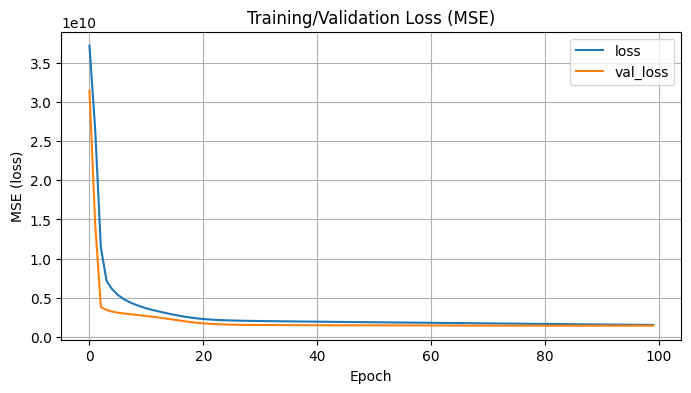

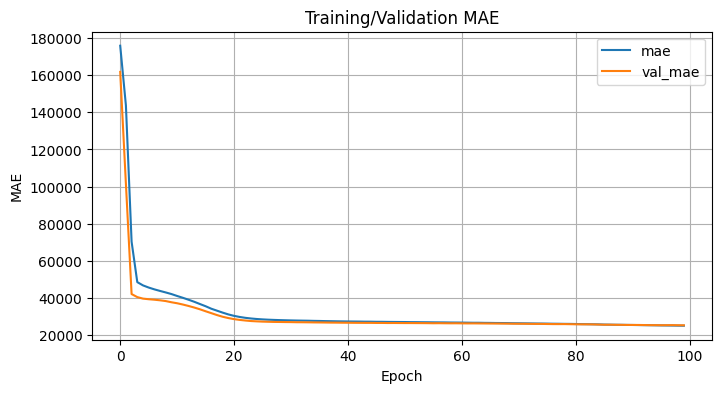

In [ ]:
# График истории обучения
hist_df = pd.DataFrame(history.history)
ax = hist_df[['loss','val_loss']].plot(figsize=(8,4), grid=True)
ax.set_ylabel('MSE (loss)')
ax.set_xlabel('Epoch')
ax.set_title('Training/Validation Loss (MSE)')
plt.show()

# Отдельный график для MAE (в одном плохо видно)
ax = hist_df[['mae','val_mae']].plot(figsize=(8,4), grid=True)
ax.set_ylabel('MAE')
ax.set_xlabel('Epoch')
ax.set_title('Training/Validation MAE')
plt.show()

In [ ]:

# Итоговая оценка на валидации
scores = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation — loss (MSE): {scores[0]:.2f} | MAE: {scores[1]:.2f}")

Validation — loss (MSE): 1438020992.00 | MAE: 25338.87


### Прогнозирование

In [ ]:
preds = model.predict(test_edited)
preds = np.squeeze(preds)   # из (N,1) в (N,)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
#пример
output = pd.DataFrame(
{
    'Id':test_data['Id'],
    'SalePrice': np.squeeze(preds)
})
output


,Id,SalePrice
0,1461,152067.875000
1,1462,175984.984375
2,1463,191448.312500
3,1464,191766.484375
4,1465,172124.265625
...,...,...
1454,2915,97230.750000
1455,2916,115112.039062
1456,2917,196134.859375
1457,2918,104150.375000


## Задание


В задние представлено логика выполнения с использование tensorflow/keras. Выполнять можно как с использованием tensorflow/keras, так и pytorch.


**При выполнении:**

Выведите отчет нейросетевой регрессионной модели, для  прогнозирование цены на жилье.


Подберите  разные комбинации гиперпараметров таким образом, чтобы получить лучший результат на тестовом наборе данных.

Попробуйте использовать разное количество нейронов на входном слое. Опишите достигнутый результат.

Добавьте в нейронную сеть скрытый слой с разным количеством нейронов.

Используйте разное количество эпох. Опишите достигнутый результат.

Используйте разные размеры мини-выборки (batch_size). Опишите достигнутый результат.

Попробуйте использовать разные значения оптимизатора `optimizers` и функции потерь `loss`. Сравните полученные результаты.


#Подберите  разные комбинации гиперпараметров таким образом, чтобы получить лучший результат на тестовом наборе данных.

In [ ]:
results = []

configs = [
    {"name": "base", "layers": [128, 64], "optimizer": "adam", "loss": "mse", "epochs": 100, "batch": 32},
    {"name": "big layers", "layers": [256, 128, 64], "optimizer": "adam", "loss": "mse", "epochs": 100, "batch": 32},
    {"name": "more epochs", "layers": [128, 64], "optimizer": "adam", "loss": "mse", "epochs": 300, "batch": 32},
    {"name": "small batch", "layers": [128, 64], "optimizer": "adam", "loss": "mse", "epochs": 100, "batch": 16},
    {"name": "sgd optimizer", "layers": [128, 64], "optimizer": "sgd", "loss": "mse", "epochs": 100, "batch": 32},
    {"name": "mae loss", "layers": [128, 64], "optimizer": "adam", "loss": "mae", "epochs": 100, "batch": 32},
]

for cfg in configs:
    tf.random.set_seed(40)
    model = Sequential()
    model.add(Dense(cfg["layers"][0], activation="relu", input_shape=(X_train.shape[1],)))
    for units in cfg["layers"][1:]:
        model.add(Dense(units, activation="relu"))
    model.add(Dense(1))

    model.compile(optimizer=cfg["optimizer"], loss=cfg["loss"], metrics=["mae"])
    hist = model.fit(X_train, y_train,
                     validation_data=(X_val, y_val),
                     epochs=cfg["epochs"],
                     batch_size=cfg["batch"],
                     verbose=0)

    last_val_mae = hist.history["val_mae"][-1]
    results.append({
        "config": cfg["name"],
        "val_mae": last_val_mae,
        "epochs": cfg["epochs"],
        "batch_size": cfg["batch"],
        "loss": cfg["loss"],
        "optimizer": cfg["optimizer"]
    })

df_results = pd.DataFrame(results).sort_values("val_mae")
df_results


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

,config,val_mae,epochs,batch_size,loss,optimizer
2,more epochs,22160.746094,300,32,mse,adam
5,mae loss,24566.291016,100,32,mae,adam
1,big layers,25396.130859,100,32,mse,adam
0,base,25615.212891,100,32,mse,adam
3,small batch,25941.210938,100,16,mse,adam
4,sgd optimizer,NaN,100,32,mse,sgd


**Вопросы:**

Как выше перечисленные параметры влияют на полученный вами результат?


- Увеличение числа нейронов и слоёв повышает модельную сложность → выше точность, но больше риск переобучения.
- Большее количество эпох позволяет модели дольше учиться, но может привести к переобучению (если нет EarlyStopping).
- Размер batch_size влияет на стабильность градиента: малый batch → шумнее, но быстрее обучение.
- Разные функции потерь (MSE, MAE) и оптимизаторы (Adam, SGD) влияют на скорость и качество сходимости.
- Adam обычно работает лучше "из коробки", а MAE более устойчива к выбросам, чем MSE.


Что такое эпоха (Epoch)? В чем отличие от итерации (Iteration)?


- **Epoch** — один полный проход по всему тренировочному набору данных.
- **Iteration** — один шаг градиентного спуска (один batch).
Например: если у нас 1000 объектов и batch_size=100 → одна эпоха содержит 10 итераций.


Что такое функция активации? Какие вам известны? Как и зачем используются в нейронной сети?


Функция активации — нелинейное преобразование, применяемое к выходу нейрона.  
Без неё нейросеть сводится к обычной линейной модели.

Основные:
- **ReLU** (рекомендуется чаще всего)
- **Sigmoid** (для вероятностей, бинарной классификации)
- **tanh** (реже)
- **softmax** (для многоклассовой классификации)

В регрессии чаще всего используются ReLU или просто линейный выход (без активации).


Что такое MSE(Mean Squared Error) - Средняя квадратичная ошибка? Что такое MAE(Mean Absolute Error)? Для чего используются.

- **MSE (Mean Squared Error)** — среднеквадратичная ошибка:
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$
Чувствительна к выбросам. Используется, когда большие ошибки нужно штрафовать сильнее.

- **MAE (Mean Absolute Error)** — средняя абсолютная ошибка:
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|
$$
Устойчивее к выбросам. Хорошо интерпретируется ("в среднем ошибка X единиц").

Обе используются как метрики качества для задач регрессии.
